In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Linear Regression - One Variable

In [6]:
path = os.getcwd() + '/data/single_var.txt'
s_data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
s_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
s_data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


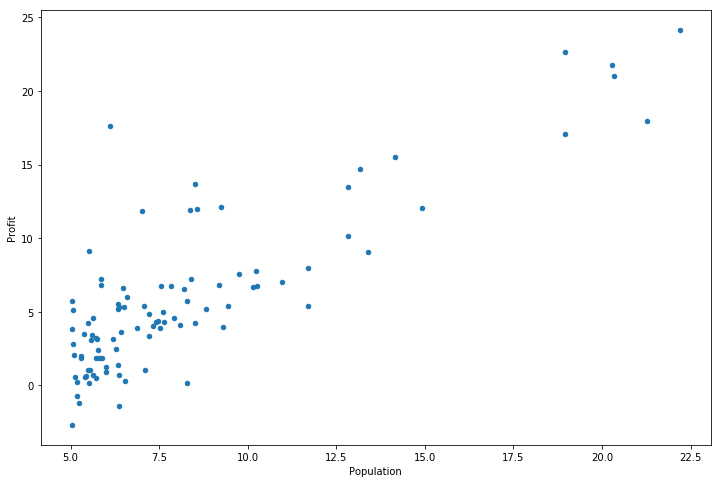

In [10]:
s_data.plot(kind = 'Scatter', x='Population', y='Profit', figsize=(12,8))

In [11]:
# function to calculate cost
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T) - y), 2)
    return np.sum(inner) / (2*len(X))

In [ ]:
s_data.insert(0, 'Ones', 1)

In [16]:
s_data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [21]:
# training and test set
cols = s_data.shape[1]
X = s_data.iloc[:,0:cols-1]
y = s_data.iloc[:,cols-1:cols]

In [23]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [24]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [26]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [28]:
X.shape, y.shape, theta.shape

((97L, 2L), (97L, 1L), (1L, 2L))

In [29]:
computeCost(X, y, theta)

32.072733877455676

In [33]:
# function to perform gradient descent on the parameters theta using update rules defined in the text

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [54]:
alpha = 0.01
iters = 1000

In [55]:
# run gradient descent algorithm
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [56]:
computeCost(X, y, g)

4.5159555030789118

In [40]:
# plot linear model
x = np.linspace(s_data.Population.min(), s_data.Population.max(), 100)
f = g[0,0] + ( g[0,1] * x)

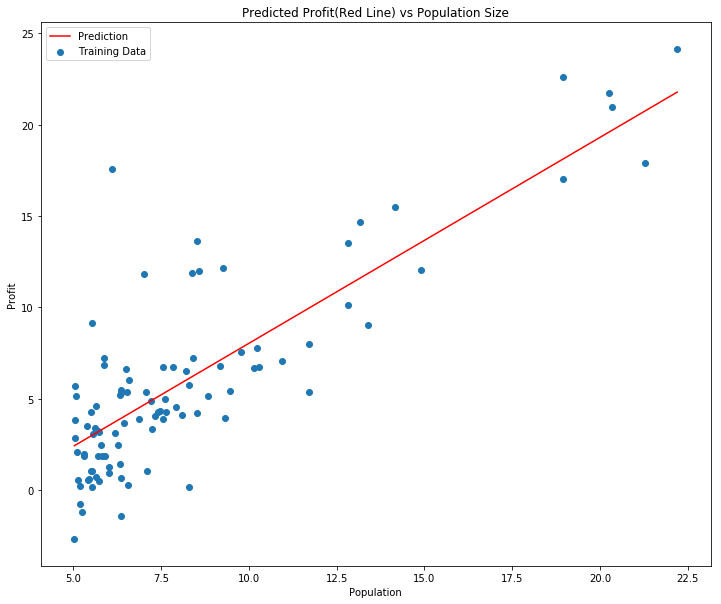

In [43]:
# plot initial data and regression line
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(s_data.Population, s_data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit(Red Line) vs Population Size')

## Linear Regression - Multiple Variable

In [64]:
path = os.getcwd() + '\data\multi_var.txt'
print path
m_data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
m_data.head()

C:\Users\Raja Harsha\Documents\GitHub\Machine-Learning\MultiVariate-Linear-Regression\data\multi_var.txt


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [65]:
# Normalize the data to feature all data on same scale
m_data = (m_data - m_data.mean()) / m_data.std()
m_data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [70]:
m_data.insert(0, 'Ones', 1)

cols = m_data.shape[1]
X2 = m_data.iloc[:, 0:cols-1]
y2 = m_data.iloc[:, cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [72]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(X2, y2, g2)

0.13070336960771892

## Alternatively using Scikit-Learn Model

In [74]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

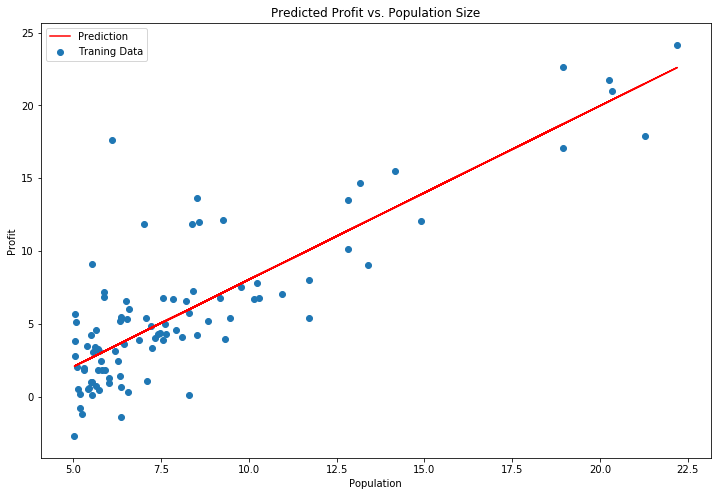

In [76]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(s_data.Population, s_data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')